In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

df = pd.read_csv("C:/Users/jtcUser/Documents/Systems/Training/PythonCourse/Section3/files/meteorite-landings.csv")
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [8]:
df = df.dropna(subset=["reclong", "reclat"])
df = df[df.reclong < 300]

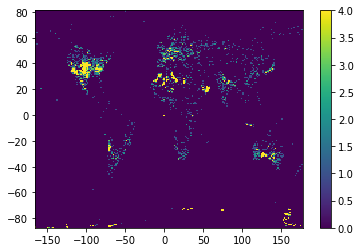

In [10]:
## 2D histograms using matplotlib
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=4)
plt.colorbar();

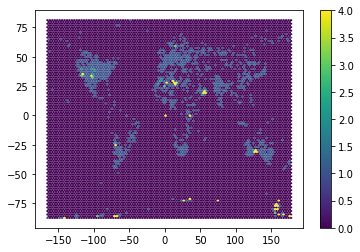

In [12]:
## 2D Hex plot using matplotlib
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=0.0)
plt.colorbar();

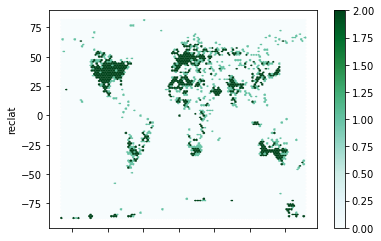

In [14]:
## 2D Hex plot using pandas
df.plot.hexbin(x="reclong", y="reclat", vmax=2, gridsize=100, linewidth=0.25);

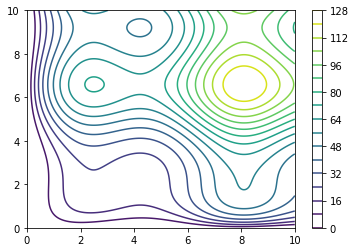

In [15]:
## Contour plot using matplotlib
spacing = np.linspace(0, 10, 200)
X, Y = np.meshgrid(spacing, spacing)
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2

plt.contour(X, Y, Z, levels=20)
plt.colorbar();

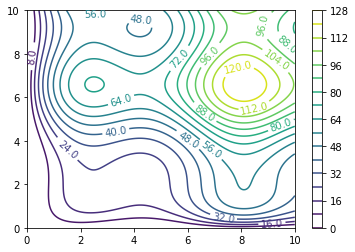

In [16]:
## Contour plot using matplotlib add labels - would be a good contour map
c = plt.contour(X, Y, Z, levels=20)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();

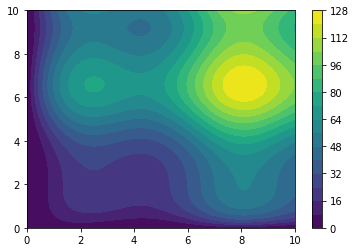

In [18]:
## Contour plot using matplotlib and fill in the areas
c = plt.contourf(X, Y, Z, levels=20)
plt.colorbar();

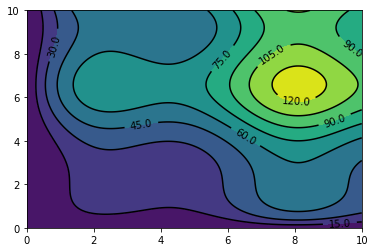

In [19]:
## Contour plot using matplotlib with labels and fill
plt.contourf(X, Y, Z, levels=10)
c = plt.contour(X, Y, Z, levels=10, colors="black")
plt.clabel(c, inline=True, fmt="%0.1f");

In [ ]:
## KDE - kornel density estimation


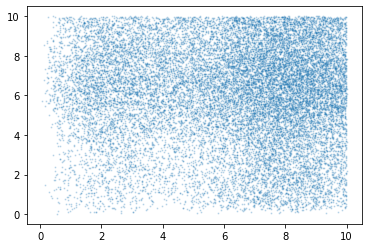

In [20]:
## matplotlib

# This is called rejection sampling, a way to brute force sample any surface, so long
# as you're fine waiting for slow code
n = 50000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs /= zs.max()
passed = np.random.uniform(0, 1, n) < zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=0.2);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


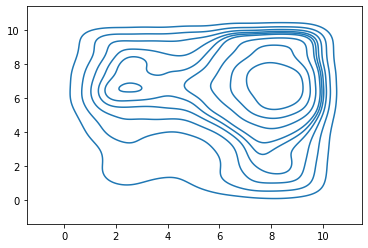

In [21]:
## seaborn KDE
sb.kdeplot(xs, ys);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


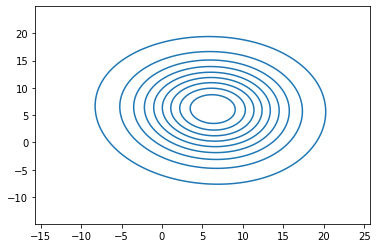

In [22]:
sb.kdeplot(xs, ys, bw=2.0);

In [ ]:
## Jointplots

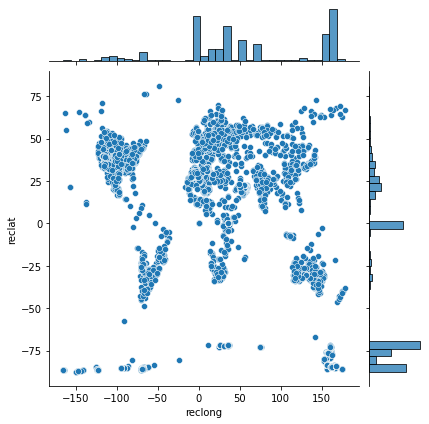

In [23]:
## seaborn
sb.jointplot(data=df, x="reclong", y="reclat");

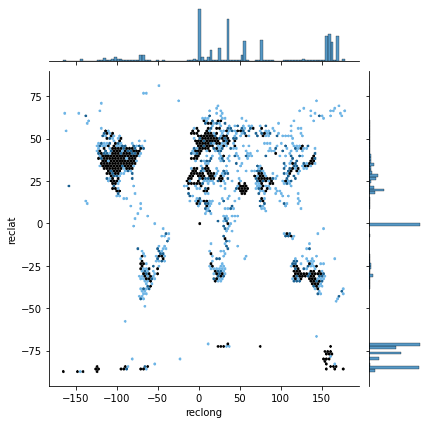

In [24]:
## seaborn 
sb.jointplot(data=df, x="reclong", y="reclat", kind="hex", 
             gridsize=100, vmax=3, linewidth=0, marginal_kws={"bins": 100});

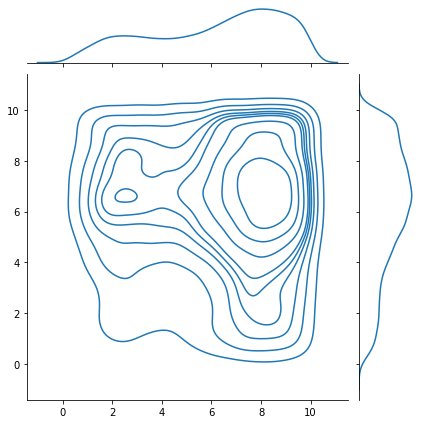

In [25]:
## seaborn combine jointplot and KDE
sb.jointplot(x=xs, y=ys, kind="kde");

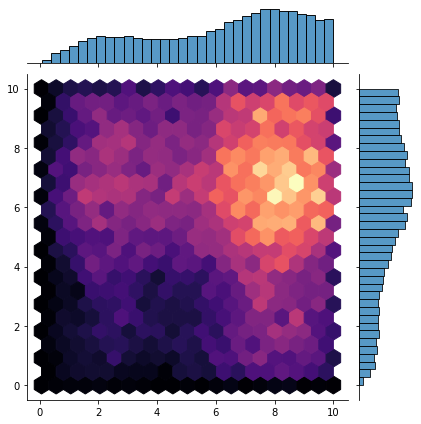

In [26]:
## seaborn combine jointplot and hex plot
sb.jointplot(x=xs, y=ys, kind="hex", gridsize=20, cmap="magma");

In [ ]:
## seaborn pairplot - did not complete
sb.pairplot(data=df[["reclat", "reclong", "mass"]]);